In [1]:
import pandas as pd
import numpy as np
from pyopenms import OnDiscMSExperiment
import matplotlib.pyplot as plt

In [2]:
def print_results(df):
    results_df = df[["amino_acid", "mod_name"]].groupby(["amino_acid"])
    for amino_acid, sub_df in results_df:
        print(amino_acid)
        print(pd.unique(sub_df["mod_name"]))

In [3]:
def get_mods(df):
    #return df[np.logical_and(df["mod_name"]!="unmodified", df["type"]!="NL")]
    return df[df["mod_name"]!="unmodified"]

In [4]:
def grouped_bar_mods(dfs_unmod, dfs_mod, xticklabels, xlabel, out_name=None, legend_loc="upper right"):
    x = np.arange(len(dfs_mod))
    width = 0.25

    fig, ax = plt.subplots(layout='constrained')

    if len(dfs_unmod) > 0:
        ax.bar_label(ax.bar(x, [len(get_mods(df)) for df in dfs_unmod], width, label="Dataset without mods"), padding=3)

    ax.bar_label(ax.bar(x + width, [len(get_mods(df)) for df in dfs_mod], width, label="Dataset with mods"), padding=3)

    ax.set_ylabel('Number of detected diagnostic ions')
    ax.set_xlabel(xlabel)
    #ax.set_title(f"Number of detected diagnostic ions for different {xlabel}")
    ax.set_xticks(x + width/2, xticklabels)

    if legend_loc is not None:
        ax.legend(loc=legend_loc)
    #ax.set_ylim(0, 250)

    if out_name is not None:
        plt.savefig(f"../../data/plots/{out_name}.svg", bbox_inches="tight")
    plt.show()


In [5]:
def grouped_bar_mods_spectra(dfs_unmod, dfs_mod, xticklabels, xlabel, out_name=None, legend_loc="upper right"):
    x = np.arange(len(dfs_unmod))
    width = 0.25

    fig, ax = plt.subplots(layout='constrained')

    ax.bar_label(ax.bar(x, [len(get_mods(df)["spectrum_id"].unique()) for df in dfs_unmod], width, label="dataset without mods"), padding=3)

    ax.bar_label(ax.bar(x + width, [len(get_mods(df)["spectrum_id"].unique()) for df in dfs_mod], width, label="dataset with mods"), padding=3)

    ax.set_ylabel('Number of spectra with detected diagnostic ions')
    ax.set_xlabel(xlabel)
    #ax.set_title(f"Number of spectra with detected mod ions for different {xlabel}")
    ax.set_xticks(x + width/2, xticklabels)
    # ax.legend(loc=legend_loc)
    #ax.set_ylim(0, 250)

    if out_name is not None:
        plt.savefig(f"../../data/plots/{out_name}.svg")
    plt.show()

## DFs Higher collision energy only

In [6]:
dfs_mod_snrs = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_1.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_2.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_3.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_5.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_10.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_20.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_50.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_100.csv"),
]

In [ ]:
dfs_mod_ppm = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [7]:
dfs_unmod_snrs = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_1.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_2.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_3.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_5.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_10.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_20.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_50.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_100.csv"),
]

In [ ]:
dfs_unmod_ppm = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [7]:
dfs_different_collision_energies_5ppm = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_30NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_35NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_40NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_45NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_55NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_60NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
]

In [8]:
dfs_different_collision_energies = [
    pd.read_csv("../../data/result_csvs/230228_Immonium_30NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_35NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_40NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_45NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_55NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230228_Immonium_60NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
]

## DFs "DIA" files (mixed energy)

In [6]:
dfs_dia_mod_snr = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_1_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_2_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_5_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_10_unimod.csv"),
]

In [6]:
dfs_dia_mod_10ppm_snr = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_1_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_2_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_5_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_10_unimod.csv"),
]

In [7]:
dfs_dia_mod_ppm = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
]

In [9]:
dfs_dia_unmod_snr = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_1_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_2_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_5_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_10_unimod.csv"),
]

In [11]:
dfs_dia_unmod_10ppm_snr = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_1_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_2_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_5_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_10_unimod.csv"),
]

In [8]:
dfs_dia_unmod_ppm = [
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_3_unimod.csv"),
    pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3_unimod.csv"),
]

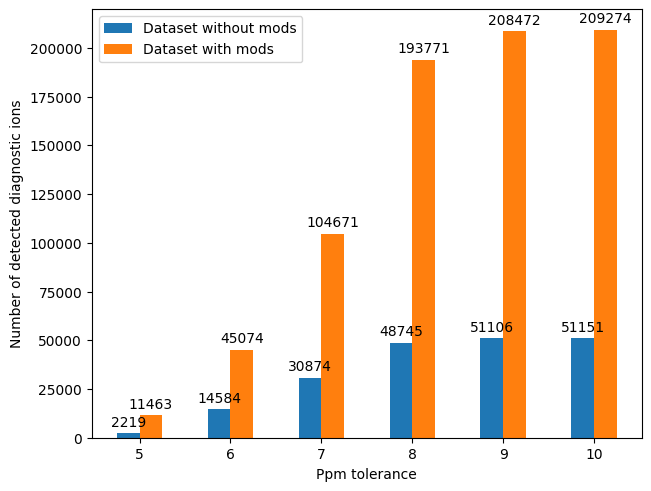

In [52]:
grouped_bar_mods(dfs_dia_unmod_ppm, dfs_dia_mod_ppm, [5, 6, 7, 8, 9, 10], "Ppm tolerance", legend_loc="upper left", out_name="dia_ppm tolerances")

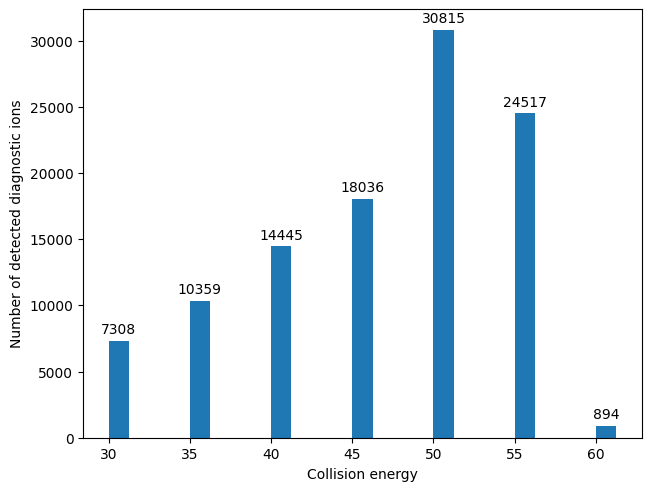

In [53]:
grouped_bar_mods([], dfs_different_collision_energies_5ppm, [30, 35, 40, 45, 50, 55, 60], "Collision energy", out_name="collision_energies_5ppm", legend_loc=None)

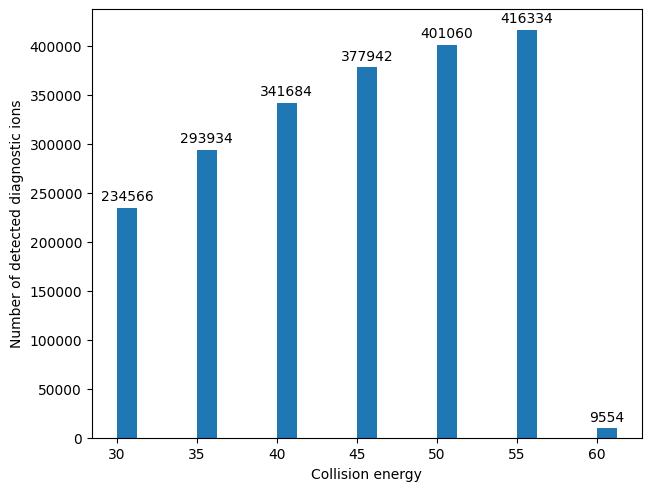

In [54]:
grouped_bar_mods([], dfs_different_collision_energies, [30, 35, 40, 45, 50, 55, 60], "Collision energy", out_name="collision_energies", legend_loc=None)

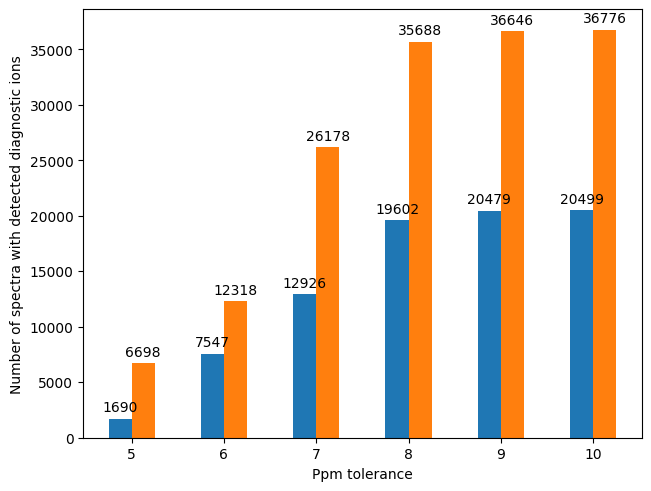

In [60]:
grouped_bar_mods_spectra(dfs_dia_unmod_ppm, dfs_dia_mod_ppm, [5, 6, 7, 8, 9, 10], "Ppm tolerance", legend_loc="upper left", out_name="dia_ppm_tolerances_spectra")

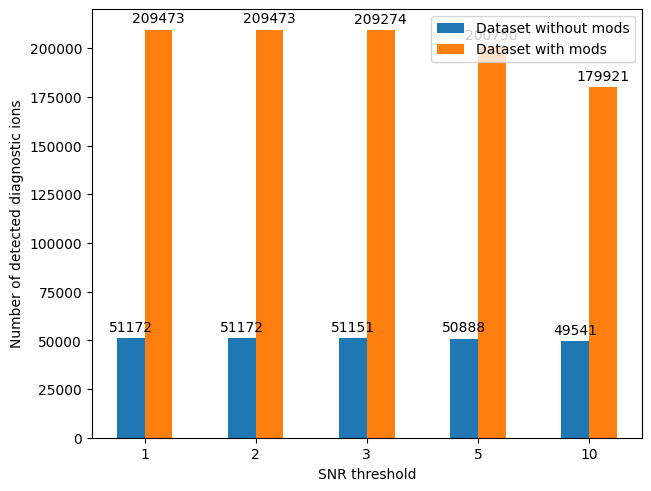

In [56]:
grouped_bar_mods(dfs_dia_unmod_10ppm_snr, dfs_dia_mod_10ppm_snr, [1,2,3,5,10], "SNR threshold", out_name="dia_snr_thresholds_10ppm")

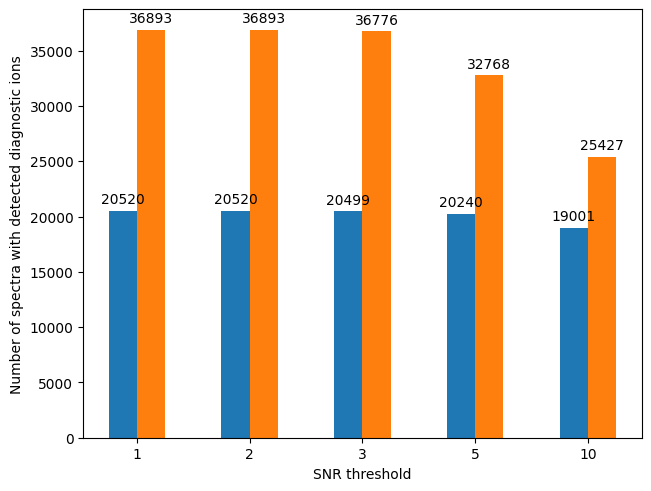

In [61]:
grouped_bar_mods_spectra(dfs_dia_unmod_10ppm_snr, dfs_dia_mod_10ppm_snr, [1,2,3,5,10], "SNR threshold", out_name="dia_snr_thresholds_10ppm_spectra")

In [ ]:
# df_dia_mod = pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv")
# df_dia_unmod = pd.read_csv("../../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv")

In [ ]:
#df_dia_unmod[df_dia_unmod == "alpha-amino-epsilon-caprolactam"] = "a.a.e.c."

In [9]:
mods_df = get_mods(dfs_dia_mod_ppm[-1])
unmods_df = get_mods(dfs_dia_unmod_ppm[-1])

In [10]:
mods_df_by_mod = mods_df[["amino_acid", "mod_name", "letter_and_unimod_format_mod", "type", "theoretical_mz", "spectrum_id"]].rename(columns={"letter_and_unimod_format_mod": "unimod"}).groupby(["amino_acid", "mod_name","unimod", "type", "theoretical_mz"]).count().rename(columns={"spectrum_id": "count"})
mods_df_by_mod

count
amino_acid mod_name          unimod         type        theoretical_mz       
Arginine   Deamidated        R(UniMod:7)    IM          130.0975          629
Cysteine   Bromobimane       C(UniMod:301)  IM          266.0958            1
           Carbamidomethyl   C(UniMod:4)    IM          133.0430          635
Histidine  Carbamidomethyl   H(UniMod:4)    IM          167.0927          552
           Methyl            H(UniMod:34)   IM          124.0869           62
           Oxidation         H(UniMod:35)   IM          126.0662            2
Lysine     Acetyl            K(UniMod:1)    IM          143.1179        27430
                                            IM-NH3      126.0913        32900
           Biotin            K(UniMod:3)    IM-NH3      310.1584         1075
                                            side-chain  227.0849          960
           Butyryl           K(UniMod:1289) IM          154.1226           78
           Carbamidomethyl   K(UniMod:4)    IM          141.1022        18023
           Crotonyl          K(UniMod:1363) IM          152.1070           50
           Diethyl           K(UniMod:518)  IM-NH(CH3)2 112.1121          661
                                            IM-NH3      140.1070           15
           Dimethyl          K(UniMod:36)   IM          129.1386           56
                                            y1          175.1441           99
           Formyl            K(UniMod:122)  IM          112.0757        22326
           Glutarylation     K(UniMod:1848) IM          182.1176           10
           Hex               K(UniMod:41)   IM          179.1000            3
                                                        191.1000            3
                                                        192.1000           97
           Malonyl           K(UniMod:747)  IM          126.0913        32900
                                                        170.0812            3
           Methyl            K(UniMod:34)   IM          115.1230            5
                                            IM-NH3      98.0964         17979
                                            y1          161.1285          181
           Propionyl         K(UniMod:58)   IM          140.1070           15
           Succinyl          K(UniMod:64)   IM          184.0968           49
           Thiazolidine      K(UniMod:1009) IM          113.1073          198
           hydroxyisobutyryl K(UniMod:1849) IM          170.1176           15
Methionine Dioxidation       M(UniMod:425)  IM          136.0427           21
           Oxidation         M(UniMod:35)   IM          120.0478            4
Proline    Oxidation         P(UniMod:35)   IM          86.0600         17075
Tryptophan Methyl            W(UniMod:34)   IM-29       144.0808          637
           Oxidation         W(UniMod:35)   IM          175.0857          136
           Thiazolidine      W(UniMod:1009) IM          171.0917          153
           Trp->Kynurenin    W(UniMod:351)  IM          163.0857            9
Tyrosine   Nitro             Y(UniMod:354)  IM          181.0608         7656
           Phospho           Y(UniMod:21)   IM          216.0420        26571

In [11]:
mods_df_by_mod.to_csv("../../data/plots/detection_mod.csv")

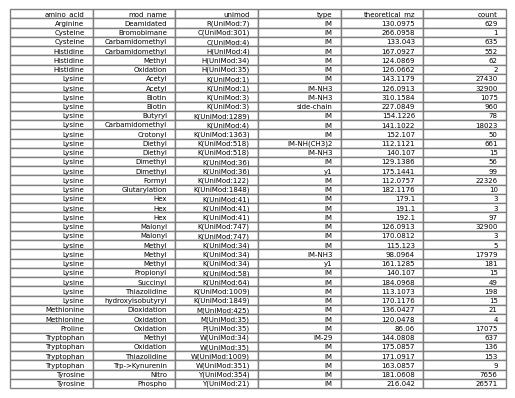

In [54]:
fig, ax = plt.subplots()

y_pos = np.arange(len(mods_df_by_mod))
# ax.barh(y_pos, mods_df_by_mod["count"], align='center')
# #ax.set_yticks(y_pos, [(",").join([str(index_field) for index_field in mod.Index[:2]]) for mod in mods_df_by_mod.itertuples()])
# ax.set_yticks([])
# #ax.set_xticks(np.arange(0, 35000, 10000))
# #plt.xticks(fontsize=17)
# ax.invert_yaxis()
# ax.set_xlim(0, 35000)
# ax.margins(y=0)
# ax.grid(True)
# for spine in ax.spines.values():
#     spine.set_edgecolor('grey')
fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")


table = ax.table(
    cellText=[
        [str(index_field) for index_field in mod.Index] + [mod.count]
        for mod in mods_df_by_mod.itertuples()
    ],
    colLabels=mods_df_by_mod.index.names + [mods_df_by_mod.columns.item()],
    loc="center",
    cellLoc='right',
    colLoc="right"
)
# based on https://stackoverflow.com/a/55661458
cell_height = 1 / len(mods_df_by_mod)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_height)
    cell.set_edgecolor("gray")
# table.set_fontsize(20)

fig.savefig(
    "../../data/plots/DIA_mods_10ppm_grouped_table_TEST.svg", bbox_inches="tight"
)

plt.show()

In [43]:
mods_df_by_mod.index.names + [mods_df_by_mod.columns.item()]

FrozenList(['amino_acid', 'mod_name', 'type', 'theoretical_mz', 'count'])

In [42]:
mods_df_by_mod.columns.item()

'count'

In [12]:
unmods_df_by_mod = unmods_df[["amino_acid", "mod_name", "letter_and_unimod_format_mod", "type", "theoretical_mz", "spectrum_id"]].rename(columns={"letter_and_unimod_format_mod": "unimod"}).groupby(["amino_acid", "mod_name","unimod", "type", "theoretical_mz"]).count().rename(columns={"spectrum_id": "count"})#.to_csv("tables/snr_2_ppm_5_unmods_aggregated.csv")
unmods_df_by_mod

count
amino_acid mod_name          unimod         type        theoretical_mz       
Arginine   Deamidated        R(UniMod:7)    IM          130.0975          256
Cysteine   Carbamidomethyl   C(UniMod:4)    IM          133.0430          384
Histidine  Carbamidomethyl   H(UniMod:4)    IM          167.0927          151
           HNE               H(UniMod:53)   IM          266.1863            3
           Methyl            H(UniMod:34)   IM          124.0869           56
Lysine     Acetyl            K(UniMod:1)    IM          143.1179        12057
                                            IM-NH3      126.0913          815
           Butyryl           K(UniMod:1289) IM          154.1226           35
           Carbamidomethyl   K(UniMod:4)    IM          141.1022        14188
           Crotonyl          K(UniMod:1363) IM          152.1070           37
           Diethyl           K(UniMod:518)  IM-NH(CH3)2 112.1121           84
                                            IM-NH3      140.1070            5
           Dimethyl          K(UniMod:36)   IM          129.1386            3
           Formyl            K(UniMod:122)  IM          112.0757        17750
           Glutarylation     K(UniMod:1848) IM          182.1176            8
           Hex               K(UniMod:41)   IM          179.1000            2
                                                        191.1000            1
                                                        192.1000          163
           Malonyl           K(UniMod:747)  IM          126.0913          815
                                                        170.0812            4
           Methyl            K(UniMod:34)   IM-NH3      98.0964          1911
           Propionyl         K(UniMod:58)   IM          140.1070            5
           Succinyl          K(UniMod:64)   IM          184.0968           31
           Thiazolidine      K(UniMod:1009) IM          113.1073           94
           hydroxyisobutyryl K(UniMod:1849) IM          170.1176            7
Methionine Dioxidation       M(UniMod:425)  IM          136.0427           10
           Oxidation         M(UniMod:35)   IM          120.0478            2
Proline    Oxidation         P(UniMod:35)   IM          86.0600           720
Tryptophan Methyl            W(UniMod:34)   IM-29       144.0808          271
           Oxidation         W(UniMod:35)   IM          175.0857           97
           Thiazolidine      W(UniMod:1009) IM          171.0917           73
           Trp->Kynurenin    W(UniMod:351)  IM          163.0857           10
Tyrosine   Nitro             Y(UniMod:354)  IM          181.0608         1102
           Phospho           Y(UniMod:21)   IM          216.0420            1

In [14]:
unmods_df_by_mod.to_csv("../../data/plots/detection_unmod.csv")

In [ ]:
#unmods_df[unmods_df == "alpha-amino-epsilon-caprolactam"] = "a.a.e.c"

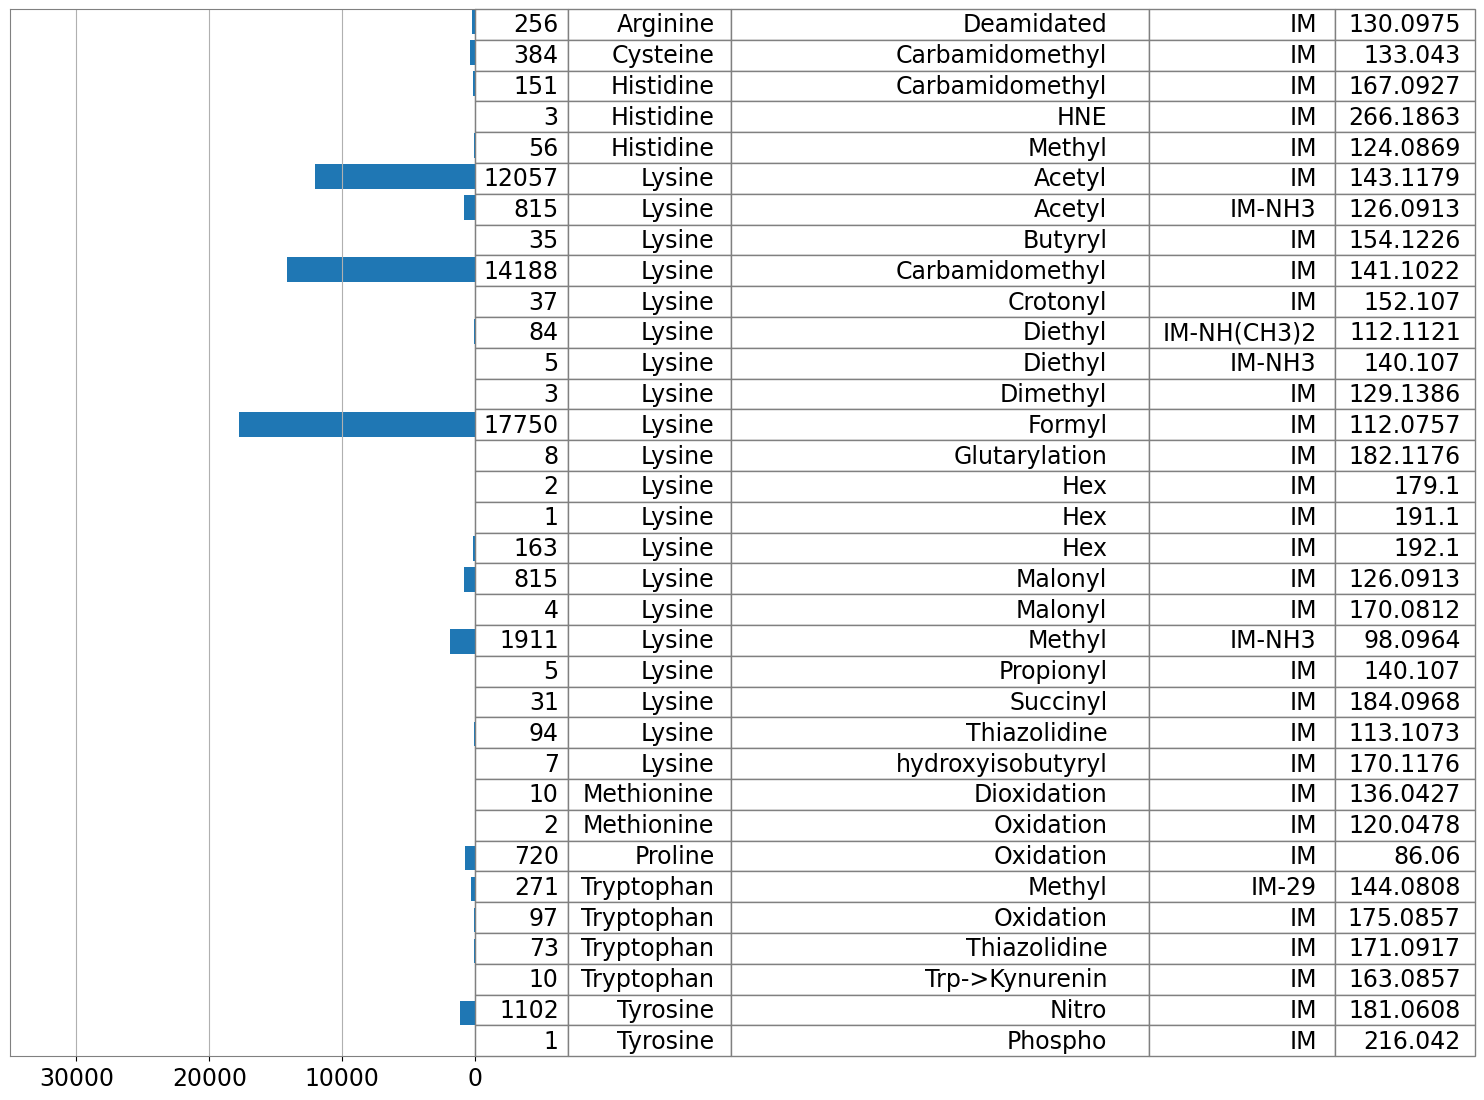

In [35]:
fig, ax = plt.subplots(figsize=(6, 16*len(unmods_df_by_mod)/len(mods_df_by_mod)))

y_pos = np.arange(len(unmods_df_by_mod))
ax.barh(y_pos, unmods_df_by_mod["count"], align='center')
#ax.set_yticks(y_pos, [(",").join([str(index_field) for index_field in mod.Index[:2]]) for mod in mods_df_by_mod.itertuples()])
ax.set_yticks([])
ax.set_xticks(np.arange(0, 35000, 10000))
plt.xticks(fontsize=17)
ax.invert_yaxis() 
ax.set_xlim(0, 35000)
ax.grid(True)
ax.margins(y=0)
ax.invert_xaxis() 
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

table = ax.table(cellText=[[mod.count] + [str(index_field) for index_field in mod.Index] for mod in unmods_df_by_mod.itertuples()],
                 loc="right", colWidths=[0.04, 0.07, 0.18, 0.08, 0.06])
# based on https://stackoverflow.com/a/55661458
cell_height = 1 / len(unmods_df_by_mod)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_height)
    cell.set_edgecolor("gray")
table.scale(5, 1)
table.set_fontsize(20)

fig.savefig("../../data/plots/DIA_unmods_10ppm_grouped_table.png", bbox_inches="tight")

plt.show()

In [ ]:
grouped_bar_mods(dfs_unmod_snrs[1:], dfs_mod_snrs[1:], [1,2,3,5,10,20,50,100], "SNR threshold", out_name="snr_thresholds")

In [ ]:
grouped_bar_mods(dfs_unmod_ppm, dfs_mod_ppm, [5, 6, 7, 8, 9, 10], "ppm tolerance", legend_loc="upper left", out_name="ppm tolerances")

In [17]:
grouped_bar_mods_spectra(dfs_unmod_ppm, dfs_mod_ppm, [5, 6, 7, 8, 9, 10], "ppm tolerances", legend_loc="upper left")

NameError: name 'dfs_unmod_ppm' is not defined